# Quantifying Shakespeare
Analyzing the frequencies of different letters in Shakespeare's work.

(Data from: bit.ly/shakespeare-txt)

In this Notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
2. Visualize the frequencies with a bar graph

# Reading Lines

In [1]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a text file into a list of strings for each line"""
    lines: list[str] = list()
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        # strip leading and tailing whitespaces " a " -> "a"
        line = line.strip()
        # make every character lowercase
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines

shakespeare_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakespeare_lines))


124456


# Tally function

In [2]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutates counts by increasing the value stored at key by 1"""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

{'a': 1}
{'a': 2}
{'a': 2, 'b': 1}


In [7]:
def count_letters(lines: list[str]) -> dict[str, int]:
    """Counts the frequencies of letters in a list of strings"""
    counts: dict[str, int] = {}
    for elem in lines:
        for idx in range(0, len(elem), 1):
            if elem[idx].isalpha():
                tally(counts, elem[idx])
    return counts

shakes_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakes_letters)


{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, 'e': 447204, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, 'a': 289150, 'w': 89390, 'm': 111452, 'k': 35408, 'v': 37569, 'z': 1631, 'q': 3582}


# Sorting Dictionaries

In [12]:
# Make my dictionary a list
list_version_shakes: list[tuple[str, int]] = list(shakes_letters.items())
print(list_version_shakes)
# Sort a list
sorted_letters_list = sorted(list_version_shakes)
print(sorted_letters_list)
sorted_letters_dict = dict(sorted_letters_list)
sorted_letters_dict

[('t', 329775), ('h', 236868), ('i', 253990), ('s', 248989), ('e', 447204), ('x', 5294), ('f', 80516), ('l', 170019), ('p', 58464), ('r', 237864), ('n', 243262), ('d', 149462), ('b', 61956), ('y', 94370), ('o', 314600), ('j', 4779), ('c', 88185), ('g', 68199), ('u', 128947), ('a', 289150), ('w', 89390), ('m', 111452), ('k', 35408), ('v', 37569), ('z', 1631), ('q', 3582)]
[('a', 289150), ('b', 61956), ('c', 88185), ('d', 149462), ('e', 447204), ('f', 80516), ('g', 68199), ('h', 236868), ('i', 253990), ('j', 4779), ('k', 35408), ('l', 170019), ('m', 111452), ('n', 243262), ('o', 314600), ('p', 58464), ('q', 3582), ('r', 237864), ('s', 248989), ('t', 329775), ('u', 128947), ('v', 37569), ('w', 89390), ('x', 5294), ('y', 94370), ('z', 1631)]


{'a': 289150,
 'b': 61956,
 'c': 88185,
 'd': 149462,
 'e': 447204,
 'f': 80516,
 'g': 68199,
 'h': 236868,
 'i': 253990,
 'j': 4779,
 'k': 35408,
 'l': 170019,
 'm': 111452,
 'n': 243262,
 'o': 314600,
 'p': 58464,
 'q': 3582,
 'r': 237864,
 's': 248989,
 't': 329775,
 'u': 128947,
 'v': 37569,
 'w': 89390,
 'x': 5294,
 'y': 94370,
 'z': 1631}

<BarContainer object of 26 artists>

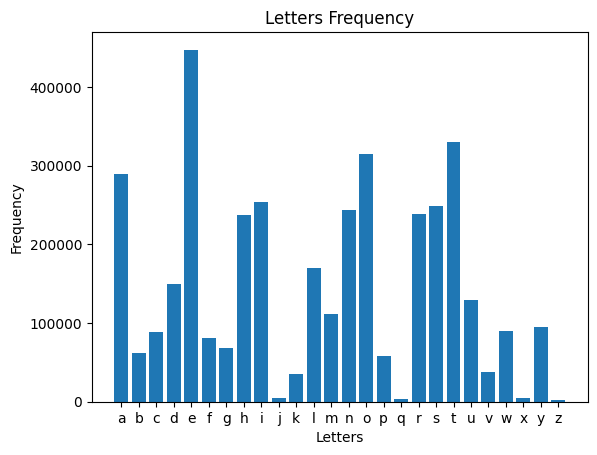

In [13]:
from matplotlib import pyplot

pyplot.title("Letters Frequency")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")
labels: list[str] = list(sorted_letters_dict.keys())
values: list[int] = list(sorted_letters_dict.values())
pyplot.bar(labels, values)